데이터 세트는 앱 스토어의 7200개 앱에 대한 정보로 구성된다.

* Features
    * id : 앱 ID
    * track_name : 앱 이름
    * size_bytes : 크기(바이트)
    * price : 가격 금액
    * rating_count_tot : 사용자 평가 수(모든 버전용)
    * rating_count_ver : 사용자 평가 수(현재 버전의 경우)
    * prime_genre : 기본 장르

* 6가지의 흥미로운 질문
  * 1) 유료 앱의 가격 분포를 어떻게 시각화 할수 있는가?
  * 2) 가격 분포는 카테고리에 따라 어떻게 영향을 받는가?
  * 3) 유료 앱 vs 무료 앱
  * 4) 유료앱은 충분히 좋은가?
  * 5) 앱의 크기가 커질수록 더 비싸지는가?
  * 6) 앱의 카테고리 분류를 어떻게 하는게 현명한가? 우리는 유료 카테고리별로 나눌수 있는가?

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d ramamet4/app-store-apple-data-set-10k-apps

In [ ]:
path_to_zip_file = '/content/app-store-apple-data-set-10k-apps.zip'
directory_to_extract_to = '/content'

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

import os
os.listdir(directory_to_extract_to)

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/AppleStore.csv")
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [11]:
# 결측치 X
data.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [12]:
# 데이터 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


## 1) 유료 앱의 가격 분포를 어떻게 시각화 할수 있는가?

In [9]:
data['price'].value_counts()

0.00      4056
0.99       728
2.99       683
1.99       621
4.99       394
3.99       277
6.99       166
9.99        81
5.99        52
7.99        33
14.99       21
19.99       13
8.99         9
24.99        8
13.99        6
11.99        6
29.99        6
12.99        5
15.99        4
59.99        3
17.99        3
22.99        2
23.99        2
20.99        2
27.99        2
16.99        2
49.99        2
39.99        2
74.99        1
18.99        1
34.99        1
99.99        1
299.99       1
47.99        1
21.99        1
249.99       1
Name: price, dtype: int64

In [13]:
print ('1. Free apps are ' + str(sum(data.price == 0)))
print ('2. Counting (outliers) super expensive apps ' + str(sum(data.price > 50)))
print (' -  which is around ' + str(sum(data.price > 50)/len(data.price)*100) +
       " % of the total Apps")
print (' Thus we will dropping the following apps')
outlier=data[data.price>50][['track_name','price','prime_genre','user_rating']]

# 무료 앱 데이터셋
freeapps = data[data.price==0]
outlier

1. Free apps are 4056
2. Counting (outliers) super expensive apps 7
 -  which is around 0.09726274836737529 % of the total Apps
 Thus we will dropping the following apps


,track_name,price,prime_genre,user_rating
115,Proloquo2Go - Symbol-based AAC,249.99,Education,4.0
162,NAVIGON Europe,74.99,Navigation,3.5
1136,Articulation Station Pro,59.99,Education,4.5
1479,LAMP Words For Life,299.99,Education,4.0
2181,Articulation Test Center Pro,59.99,Education,4.5
2568,KNFB Reader,99.99,Productivity,4.5
3238,FineScanner Pro - PDF Document Scanner App + OCR,59.99,Business,4.0


In [14]:
# outlier 제거 후

# 유료앱 데이터 셋
paidapps =data[((data.price<50) & (data.price>0))]

# 유료 앱의 최대가격
print('Now the max price of any app in new data is : ' + str(max(paidapps.price)))
# 유료 앱의 최소가격
print('Now the min price of any app in new data is : ' + str(min(paidapps.price)))

Now the max price of any app in new data is : 49.99
Now the min price of any app in new data is : 0.99


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


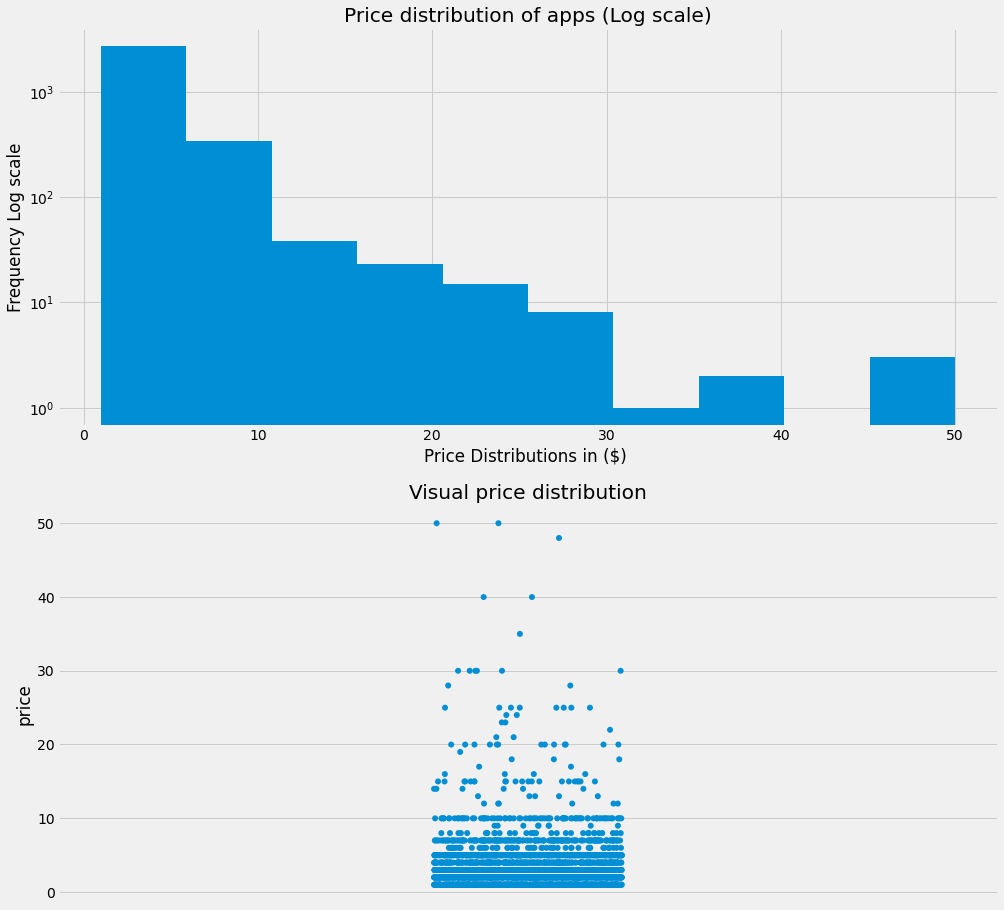

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)

plt.hist(paidapps.price,log=True)
plt.title('Price distribution of apps (Log scale)')
plt.ylabel("Frequency Log scale")
plt.xlabel("Price Distributions in ($) ")

plt.subplot(2,1,2)
plt.title('Visual price distribution')
sns.stripplot(data=paidapps,y='price',jitter= True,orient = 'h' ,size=6)
plt.show()

* 유료 앱의 수는 가격이 상승함에 따라 기하급수적으로 감소합니다.
* 30달러 이상 가격이 책정된 앱은 거의 없으므로 앱 가격을 30$ 미만으로 유지하는 것이 중요할 것 같다.

##2) 가격 분포는 카테고리에 따라 어떻게 영향을 받는가?

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


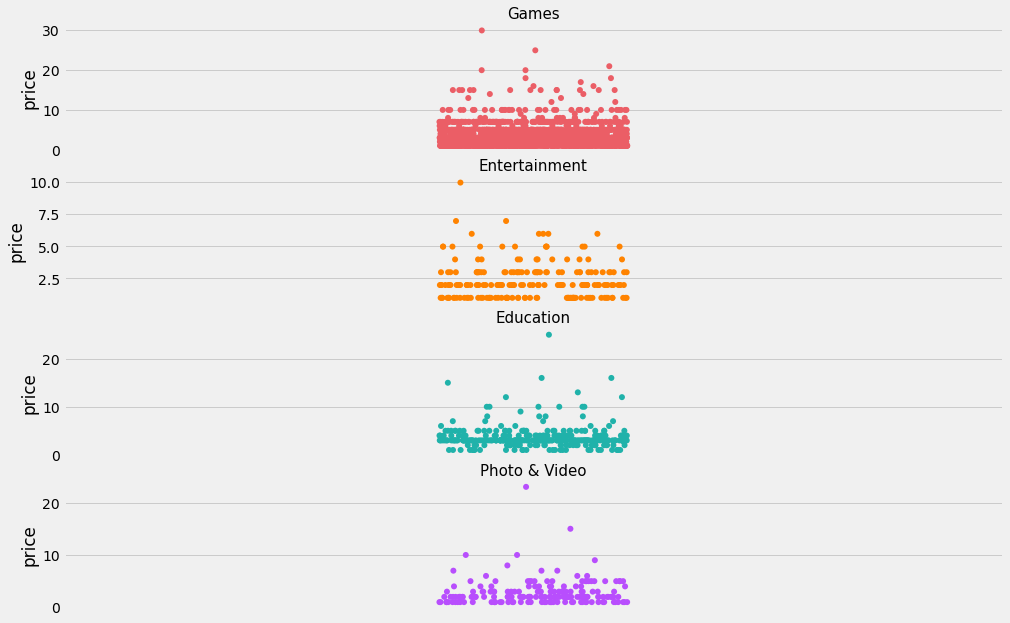

In [16]:
# strip plot은 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여줄때 주로 사용

yrange = [0,25]
fsize =15

plt.figure(figsize=(15,10))

plt.subplot(4,1,1)
plt.xlim(yrange)
games = paidapps[paidapps.prime_genre=='Games']
sns.stripplot(data=games,y='price',jitter= True , orient ='h',size=6,color='#eb5e66')
plt.title('Games',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,2)
plt.xlim(yrange)
ent = paidapps[paidapps.prime_genre=='Entertainment']
sns.stripplot(data=ent,y='price',jitter= True ,orient ='h',size=6,color='#ff8300')
plt.title('Entertainment',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,3)
plt.xlim(yrange)
edu = paidapps[paidapps.prime_genre=='Education']
sns.stripplot(data=edu,y='price',jitter= True ,orient ='h' ,size=6,color='#20B2AA')
plt.title('Education',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,4)
plt.xlim(yrange)
pv = paidapps[paidapps.prime_genre=='Photo & Video']
sns.stripplot(data=pv,y='price',jitter= True  ,orient ='h',size=6,color='#b84efd')
plt.title('Photo & Video',fontsize=fsize)
plt.xlabel('') 

plt.show()

* 유료 게임 앱의 가격대가 높고, 분포도 많다는 것을 알 수 있다.

##3) 유료 앱 vs 무료 앱

In [18]:
# 23개의 카테고리는 너무 많아 5개로 줄이도록 한다.

print("There are total of " + str(len(data.prime_genre.value_counts().index)) 
      + " categories which is little too much")
print ("Lets limit our categories to 5")

There are total of 23 categories which is little too much
Lets limit our categories to 5


In [20]:
# reducing the number of categories

# 상위 4개 장르 외에 나머지는 'Others'로 분류
s = data.prime_genre.value_counts().index[:4]
def categ(x):
    if x in s:
        return x
    else : 
        return "Others"

data['broad_genre']= data.prime_genre.apply(lambda x : categ(x))

In [21]:
# 무료 앱
free = data[data.price==0].broad_genre.value_counts().sort_index().to_frame()
# 유료 앱
paid = data[data.price>0].broad_genre.value_counts().sort_index().to_frame()
# 전체 앱
total = data.broad_genre.value_counts().sort_index().to_frame()

free.columns=['free']
paid.columns=['paid']
total.columns=['total']

dist = free.join(paid).join(total)

# 유료 비율
dist ['paid_per'] = dist.paid*100/dist.total
# 무료 비율
dist ['free_per'] = dist.free*100/dist.total

dist

,free,paid,total,paid_per,free_per
Education,132,321,453,70.860927,29.139073
Entertainment,334,201,535,37.570093,62.429907
Games,2257,1605,3862,41.558778,58.441222
Others,1166,832,1998,41.641642,58.358358
Photo & Video,167,182,349,52.148997,47.851003


In [22]:
# list & tuple 변환
list_free= dist.free_per.tolist()
tuple_free = tuple(list_free)
tuple_paidapps = tuple(dist.paid_per.tolist())

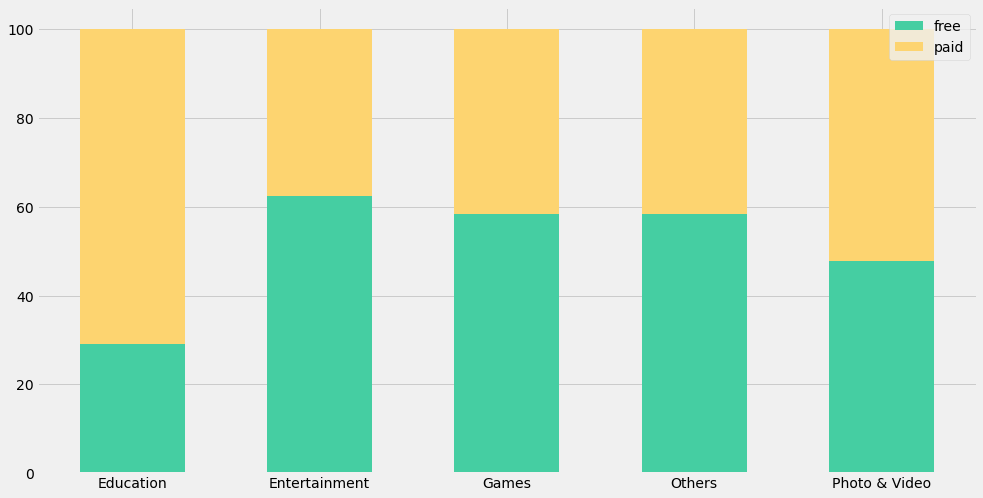

In [33]:
plt.figure(figsize=(15,8))
N=5
ind = np.arange(N)    # the x locations for the groups
width =0.56   # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, tuple_free, width, color='#45cea2')
p2 = plt.bar(ind, tuple_paidapps, width,bottom=tuple_free,color='#fdd470')
plt.xticks(ind,tuple(dist.index.tolist() ))
plt.legend( ('free', 'paid'))
plt.show()

<Figure size 1080x576 with 0 Axes>

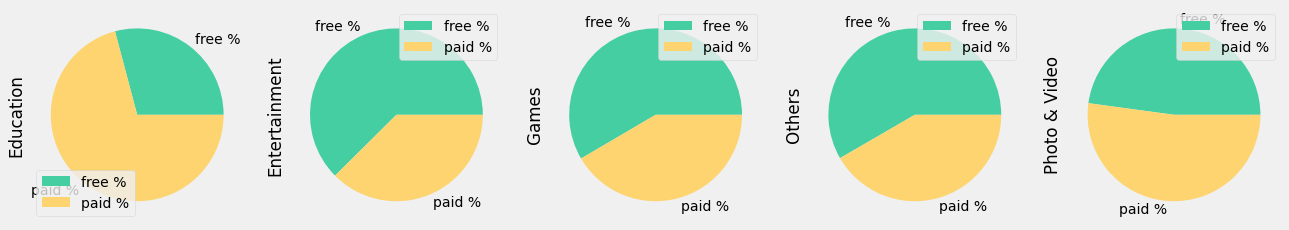

In [34]:
# for pie chart
pies = dist[['free_per','paid_per']]
pies.columns=['free %','paid %']
plt.show()

plt.figure(figsize=(15,8))
pies.T.plot.pie(subplots=True,figsize=(20,4),colors=['#45cea2','#fdd470'])
plt.show()

* 교육 카테고리에는 유료 앱의 분포가 많고, 엔터테인먼트 카테고리에는 무료 앱의 분포가 많다는 것을 확인 할 수 있다.

##4) 유료앱은 충분히 좋은가?

In [35]:
# 유료 / 무료 분류

def paid(x):
    if x>0:
        return 'Paid'
    else :
        return'Free'

data['category']= data.price.apply(lambda x : paid(x))
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,broad_genre,category
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,Games,Paid
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Others,Free
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Others,Free
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,Others,Free
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,Others,Free


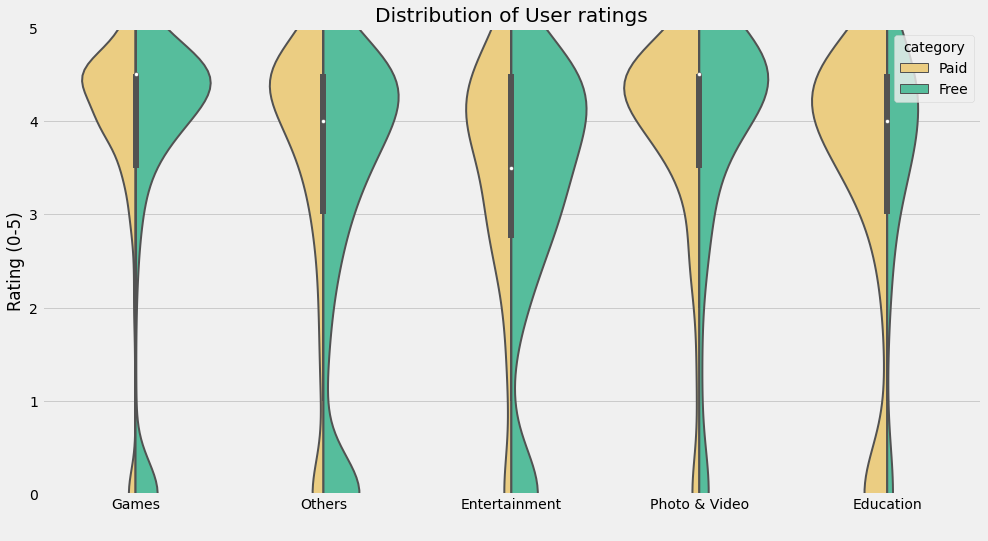

In [36]:
# violinplot - 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여준다는 장점이 있는 그래프

plt.figure(figsize=(15,8))
plt.style.use('fast')
plt.ylim([0,5])
plt.title("Distribution of User ratings")
sns.violinplot(data=data, y ='user_rating',x='broad_genre',hue='category',
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.xlabel(" ")
plt.ylabel("Rating (0-5)")

plt.show()

* Swarmplot 사용하지 않는 이유
    * Swarm은 겹치지 않는 플롯입니다. 즉, 그래프에서 각 포인트를 별도로 플롯합니다.
    * ex) 특정 값의 포인트 수가 많은 경우,그래프에 각 값을 별도로 표시해야 함으로 그래프가 수평으로 확장된다.

##5) 앱의 크기가 커질수록 더 비싸지는가?

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


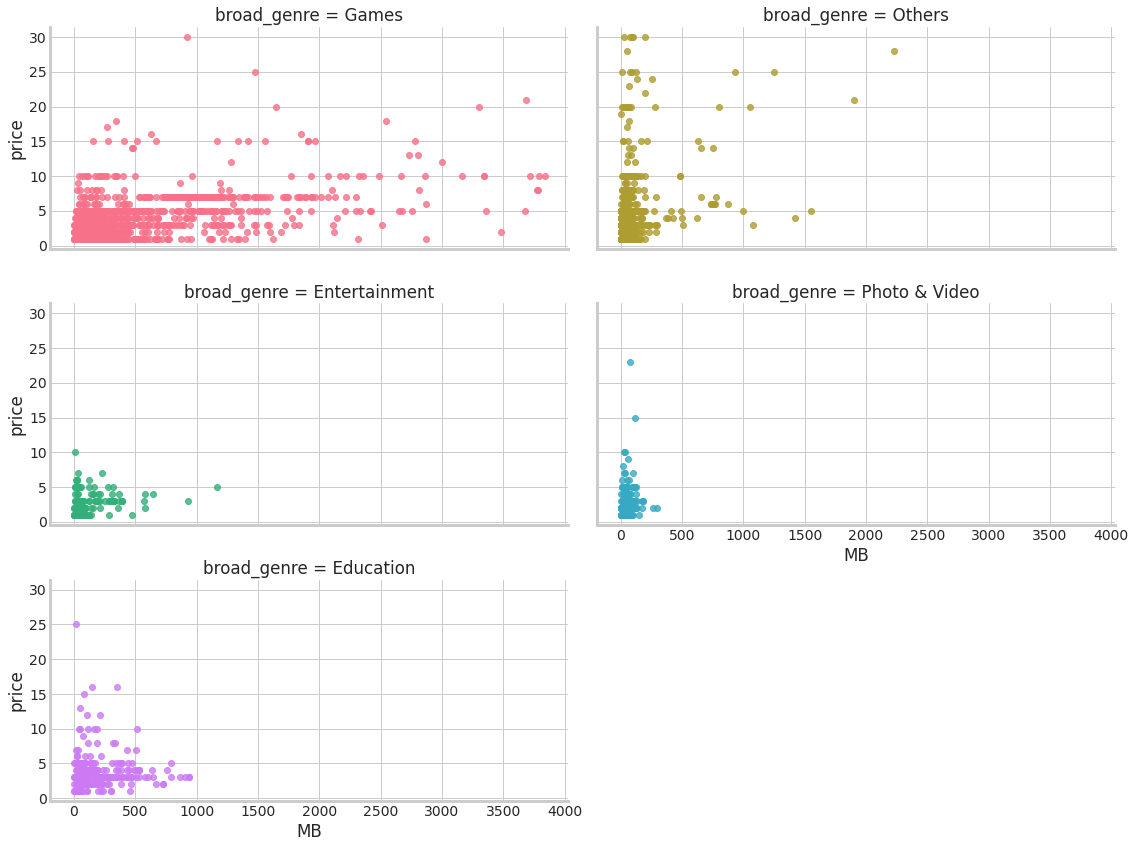

In [37]:
# lmplot으로 카테고리별 데이터 크기와 가격의 상관관계 파악

sns.color_palette("husl", 8)
sns.set_style("whitegrid")
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

# 데이터 사이즈
data ['MB']= data.size_bytes.apply(lambda x : x/1048576)
# 유료 앱의 가격을 0~30으로 제한
paidapps_regression =data[((data.price<30) & (data.price>0))]

sns.lmplot(data=paidapps_regression,
           x='MB',y='price',size=4, aspect=2,col_wrap=2,hue='broad_genre',
           col='broad_genre',fit_reg=False,palette = sns.color_palette("husl", 5))
plt.show()

* 데이터 크기와 가격은 관계가 없는 것으로 보인다.

##6) 앱의 카테고리 분류를 어떻게 하는게 현명한가? 우리는 유료 카테고리별로 나눌수 있는가?

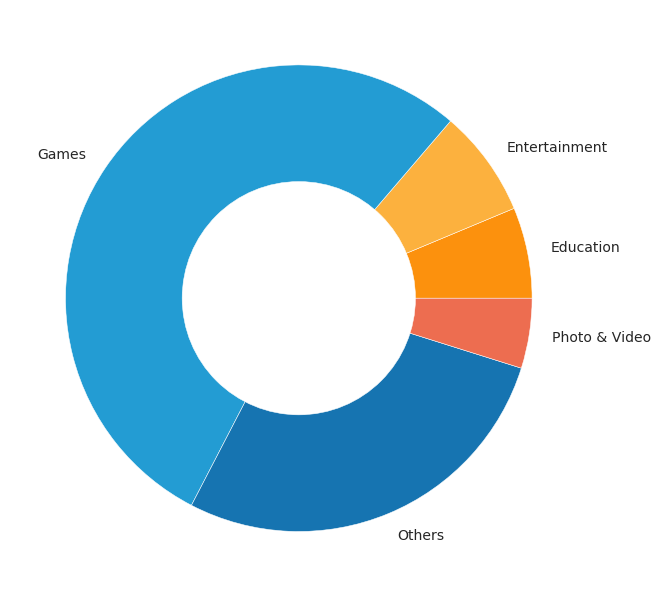

In [38]:
BlueOrangeWapang = ['#fc910d','#fcb13e','#239cd3','#1674b1','#ed6d50']
plt.figure(figsize=(10,10))
label_names=data.broad_genre.value_counts().sort_index().index
size = data.broad_genre.value_counts().sort_index().tolist()
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=label_names, colors=BlueOrangeWapang)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

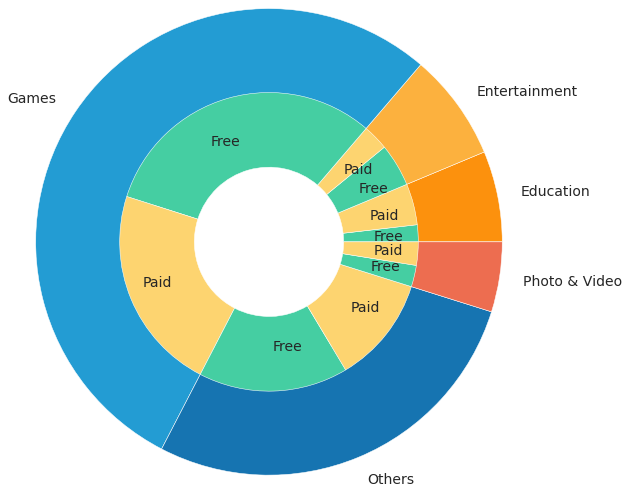

In [39]:
plt.figure(figsize=(10,10))
f=pd.DataFrame(index=np.arange(0,10,2),data=dist.free.values,columns=['num'])
p=pd.DataFrame(index=np.arange(1,11,2),data=dist.paid.values,columns=['num'])
final = pd.concat([f,p],names=['labels']).sort_index()
final.num.tolist()

plt.figure(figsize=(20,20))
group_names=data.broad_genre.value_counts().sort_index().index
group_size=data.broad_genre.value_counts().sort_index().tolist()
h = ['Free', 'Paid']
subgroup_names= 5*h
sub= ['#45cea2','#fdd470']
subcolors= 5*sub
subgroup_size=final.num.tolist()


# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.5, labels=group_names, colors=BlueOrangeWapang)
plt.setp( mypie, width=1.2, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6, labels=subgroup_names, labeldistance=0.7, colors=subcolors)
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.margins(0,0)

# show it
plt.show()